In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Analyze different time periods for RNN
for i in range(1023,1027):
    df = pd.read_csv(f'../output/runtest_{i}/overall_results.csv')
    print(f"Runtest_{i}",df.groupby("Metric")["Relative_MSE"].mean())

Runtest_1023 Metric
ATR                0.676129
Squared_Returns    1.346297
Name: Relative_MSE, dtype: float64
Runtest_1024 Metric
ATR                6.213594
Squared_Returns    7.287342
Name: Relative_MSE, dtype: float64
Runtest_1025 Metric
ATR                0.288375
Squared_Returns    2.595777
Name: Relative_MSE, dtype: float64
Runtest_1026 Metric
ATR                2.382405
Squared_Returns    3.144229
Name: Relative_MSE, dtype: float64


We can see that ATR consistently outperforms squared returns, doing best when there is ample amounts of training data. This might demonstrate ATR's ability to not overfit the model.

In [4]:
#Analyze diff layer combos LSTM
for i in range(32,41):
    df = pd.read_csv(f'../output/runtest_{i}/overall_results.csv')
    print(i,df.groupby('Metric')['Relative_MSE'].mean())

32 Metric
ATR                0.830029
Squared_Returns    0.895952
Name: Relative_MSE, dtype: float64
33 Metric
ATR                0.771406
Squared_Returns    0.628715
Name: Relative_MSE, dtype: float64
34 Metric
ATR                0.799177
Squared_Returns    0.824391
Name: Relative_MSE, dtype: float64
35 Metric
ATR                0.724802
Squared_Returns    0.823542
Name: Relative_MSE, dtype: float64
36 Metric
ATR                0.794125
Squared_Returns    0.964812
Name: Relative_MSE, dtype: float64
37 Metric
ATR                0.680897
Squared_Returns    0.544277
Name: Relative_MSE, dtype: float64
38 Metric
ATR                0.751495
Squared_Returns    0.594292
Name: Relative_MSE, dtype: float64
39 Metric
ATR                0.628070
Squared_Returns    0.565187
Name: Relative_MSE, dtype: float64
40 Metric
ATR                0.751546
Squared_Returns    0.677466
Name: Relative_MSE, dtype: float64


In [7]:
#Analyze final runs
df_final = pd.DataFrame()
num = 10028
root = f"../output/runtest_{num}"
for date in os.listdir(path=root):
    for model in os.listdir(path=os.path.join(root,date)): 
       df = pd.read_csv(os.path.join(root,date,model,'overall_results.csv'))
       df["Date"] = [date for _ in range(len(df))]
       df["Model"] = [model for _  in range(len(df))]
       #print(df)#.groupby("Metric")[["Relative_MSE","MAPE"]].mean()) 
       df_final = pd.concat((df_final,df),axis=0)
df_final.sort_values(by="MAPE").groupby(["ETF","Metric"])["MAPE"].mean()

ETF  Metric            
XLB  ATR                   0.239246
     IQR                   0.465225
     SD_Prices             0.276157
     SD_Squared_Returns    0.436080
XLE  ATR                   0.056208
     IQR                   0.267462
     SD_Prices             0.193623
     SD_Squared_Returns    0.149692
XLF  ATR                   0.092168
     IQR                   0.343394
     SD_Prices             0.212951
     SD_Squared_Returns    0.216020
XLI  ATR                   0.357105
     IQR                   0.547349
     SD_Prices             0.320754
     SD_Squared_Returns    0.399792
XLK  ATR                   0.575899
     IQR                   0.970369
     SD_Prices             0.493437
     SD_Squared_Returns    0.598138
XLP  ATR                   0.288565
     IQR                   0.429133
     SD_Prices             0.332293
     SD_Squared_Returns    0.547468
XLU  ATR                   0.157100
     IQR                   0.463363
     SD_Prices             0.258737
    

<Axes: xlabel='ETF', ylabel='MAPE'>

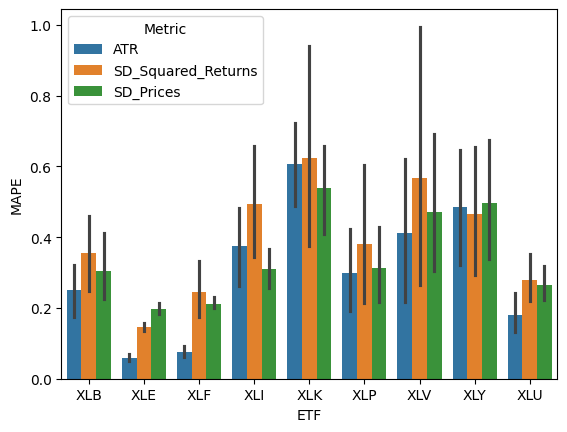

In [10]:
sns.barplot(df_final,x="ETF",y="MAPE",hue="Metric")

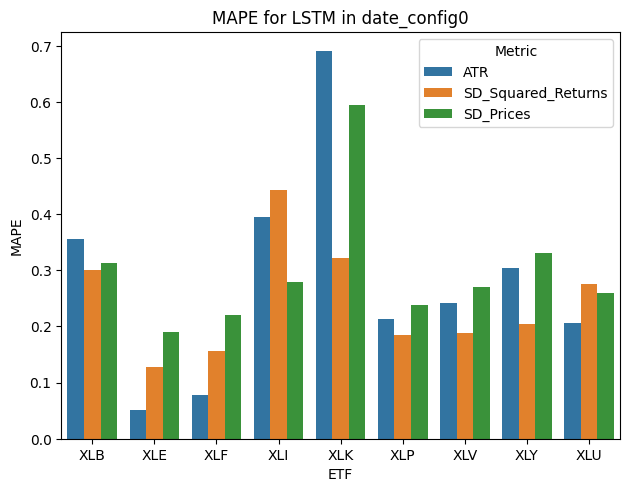

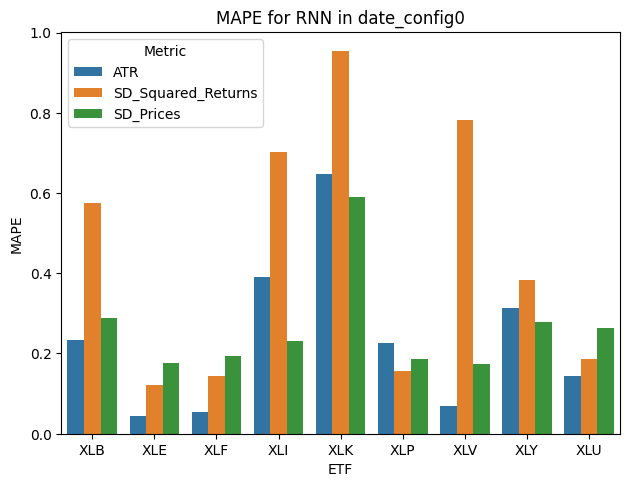

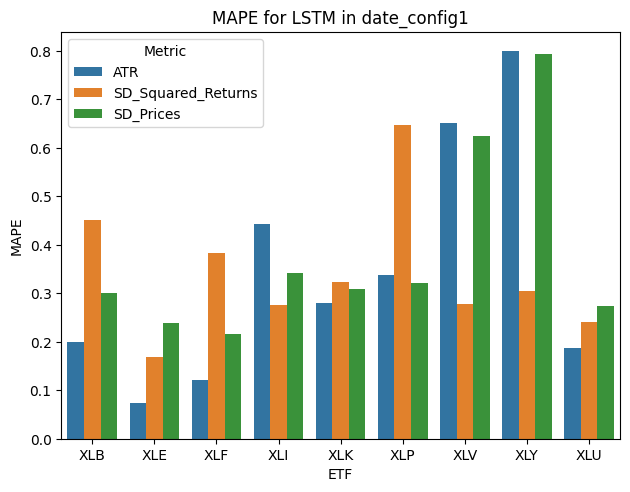

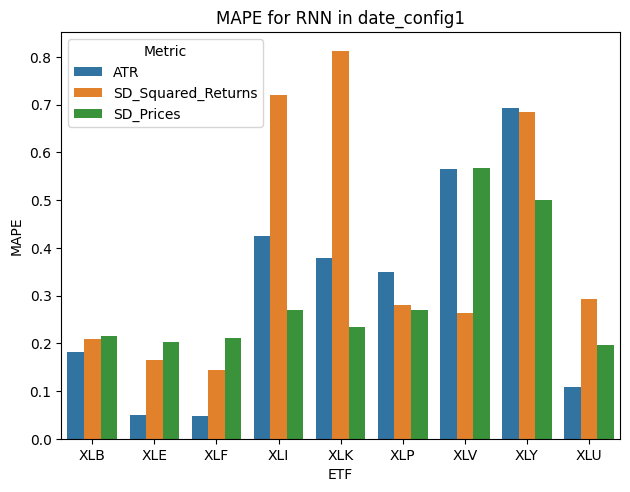

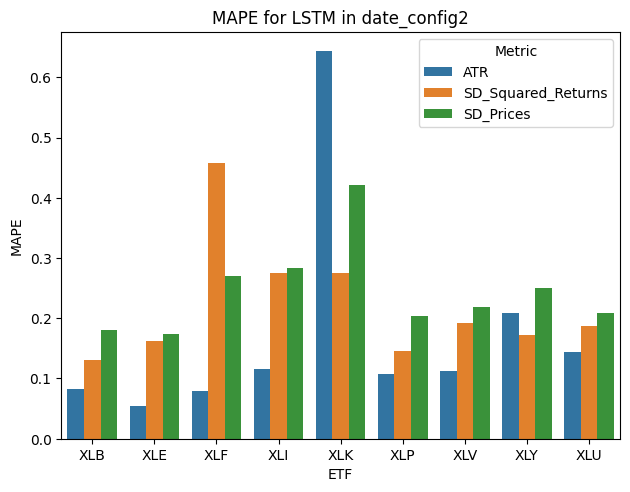

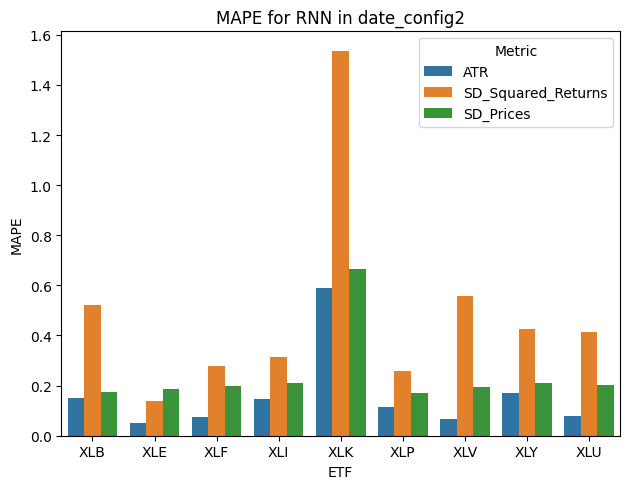

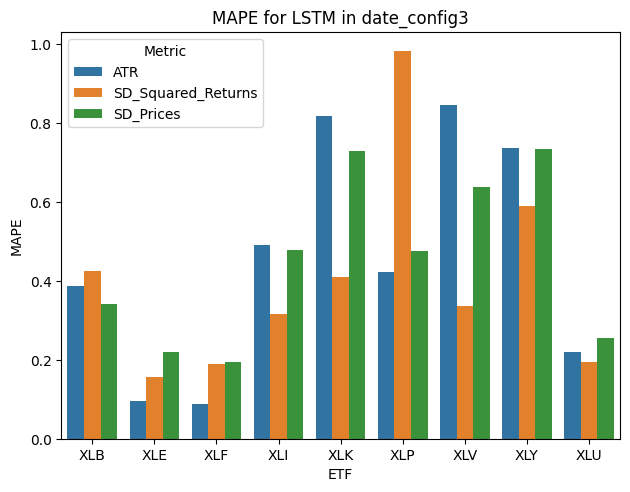

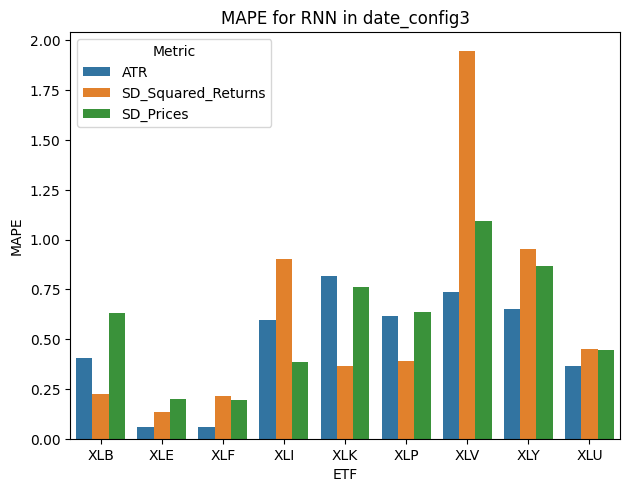

In [4]:
# show results
accuracy_metric = "MAPE"
for date,date_chunk in df_final.groupby("Date"): #returns (date_name,grouped section of df)
    for model,model_chunk in date_chunk.groupby("Model"):
        fig,ax = plt.subplots()
        sns.barplot(model_chunk,x="ETF",y=accuracy_metric,hue = "Metric", ax = ax)
        fig.tight_layout()
        ax.set_title(f"{accuracy_metric} for {model} in {date}")
        fig.savefig(fname=f"../output/analysis/{accuracy_metric}_{date}_{model}")

In [15]:
#Analyze final runs
df_final = pd.DataFrame()
num = 10028
root = f"../output/runtest_{num}"
for date in os.listdir(path=root):
    for model in os.listdir(path=os.path.join(root,date)): 
       df = pd.read_csv(os.path.join(root,date,model,'overall_results.csv'))
       df["Date"] = [date for _ in range(len(df))]
       df["Model"] = [model for _  in range(len(df))]
       #print(df)#.groupby("Metric")[["Relative_MSE","MAPE"]].mean()) 
       df_final = pd.concat((df_final,df),axis=0)
df_final.groupby(["ETF","Metric"])["Final_Value"].mean()

ETF  Metric            
XLB  ATR                    991.556174
     IQR                   1018.167305
     SD_Prices              996.538235
     SD_Squared_Returns     991.198061
XLE  ATR                    955.052949
     IQR                    985.100353
     SD_Prices              978.909958
     SD_Squared_Returns     888.980842
XLF  ATR                   1075.461033
     IQR                   1017.092223
     SD_Prices              999.714028
     SD_Squared_Returns    1045.203657
XLI  ATR                    998.009726
     IQR                   1037.919315
     SD_Prices              988.992399
     SD_Squared_Returns    1011.351781
XLK  ATR                   1003.712705
     IQR                   1063.080164
     SD_Prices             1021.855837
     SD_Squared_Returns    1013.354585
XLP  ATR                   1013.495873
     IQR                   1003.451243
     SD_Prices             1019.213356
     SD_Squared_Returns    1013.567941
XLU  ATR                   1009.648623
 

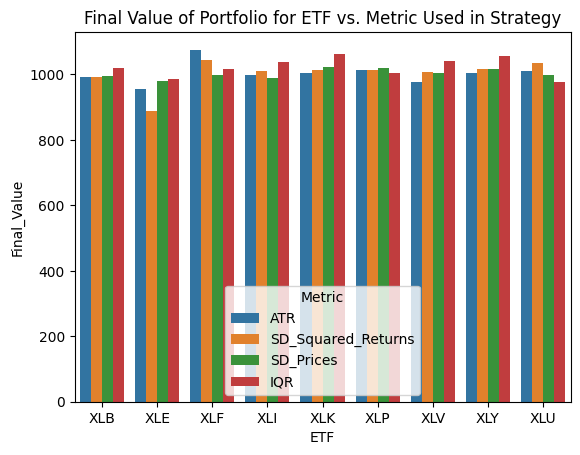

In [16]:
sns.barplot(df_final,x="ETF",y="Final_Value",hue="Metric",errorbar=None)
plt.title("Final Value of Portfolio for ETF vs. Metric Used in Strategy")
plt.savefig("../output/analysis/Final_Portfolio_Returns.png")

In [ ]:
#take corr between simulation and 